<a href="https://colab.research.google.com/github/tomersk/learn-python/blob/main/09_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 9.2 ODE

Let us solve the ordinary differential equation, given as:

$ \frac{dy}{dt} = − xt$

with,

$y_0 = 10$

First, we can import required libraries. Then, we define our function, and the timer at which we want the solution.


In [21]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

dydt = lambda x,t : -x*t
t = np.linspace(0,10)

Now, we can use integrate.odeint to solve the ordinary differential equation. Then, we can make a plot of the solution with respect to the time.

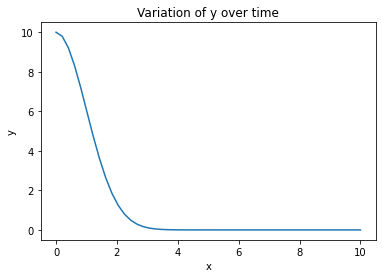

In [22]:
y = integrate.odeint(dydt, 10, t) 

plt.plot(t,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Variation of y over time")
plt.show()

Similar ODE can be written for one dimensional (lumped) groundwater model:

$\frac{dh}{dt} = -\alpha h + Q$,

where, $\alpha$ determines the amount of discharge (baseflow). $\alpha=0$ represents 0 discharge. $Q$ is the source/sink (recharge/pumping) term. Let us first understand the sensitivity of $\alpha$ by taking three cases.


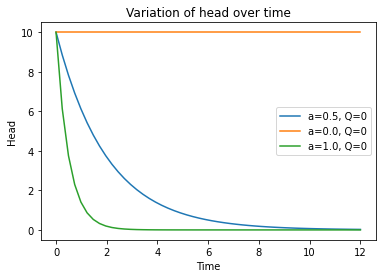

In [23]:
dhdt = lambda h,t,a,Q : -a*h + Q
t = np.linspace(0,12)

# case 1
a = 0.5
Q = 0.0
h1 = integrate.odeint(dhdt, 10, t, args=(a,Q)) 

# case 2
a = 0.0
Q = 0.0
h2 = integrate.odeint(dhdt, 10, t, args=(a,Q)) 

# case 3
a = 2.0
Q = 0.0
h3 = integrate.odeint(dhdt, 10, t, args=(a,Q)) 

plt.plot(t,h1, label="a=0.5, Q=0")
plt.plot(t,h2, label="a=0.0, Q=0")
plt.plot(t,h3, label="a=1.0, Q=0")
plt.xlabel('Time')
plt.ylabel('Head')
plt.legend(loc='best')
plt.title("Variation of head over time")
plt.show()

Since $Q$ was taken as 0, $\alpha = 0$ means 0 discharge, so no change in the groundwater table over time. As we increase value of $\alpha$, there is more discharge, hence groundwater table is falling more rapidly. 

Let us try some variation in $Q$ now.

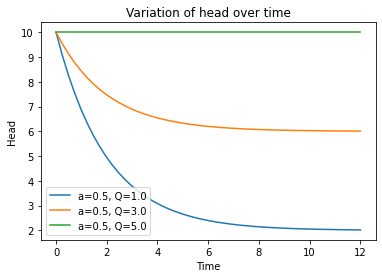

In [24]:
# case 1: Q=0
a = 0.5
Q = 1.0
h1 = integrate.odeint(dhdt, 10, t, args=(a,Q)) 

# case 2: Q=0
a = 0.5
Q = 3.0
h2 = integrate.odeint(dhdt, 10, t, args=(a,Q)) 

# case 3: Q=0
a = 0.5
Q = 5.0
h3 = integrate.odeint(dhdt, 10, t, args=(a,Q)) 

plt.plot(t,h1, label="a=0.5, Q=1.0")
plt.plot(t,h2, label="a=0.5, Q=3.0")
plt.plot(t,h3, label="a=0.5, Q=5.0")
plt.xlabel('Time')
plt.ylabel('Head')
plt.legend(loc='best')
plt.title("Variation of head over time")
plt.show()

Let us, solve a system of ordinary differential equation given as,

$\frac{dx}{dt} = Ax$,

where,
A = 
\begin{bmatrix}
-D_1 & D_1 & 0 \\
D_1 & -D_1-D_2 & D_2 \\
0 & D_2 & -D_3 \\
\end{bmatrix}

We begin with defining the parameters and $A$ matrix.

In [25]:
D = [0.2, 0.1, 0.3]
A = np.array([[D[0], -D[0], 0],
              [D[0], -D[0]-D[1], D[1]],
              [0, D[2], -D[2]]])

print(A)

[[ 0.2 -0.2  0. ]
 [ 0.2 -0.3  0.1]
 [ 0.   0.3 -0.3]]


Now, we can define our function dx/dt. 

In [26]:
def dX_dt(sm, t=0):
  return(np.dot(A,sm))

Finally, we define time, initial condition, use integrate.odeint to solve, and then plot.

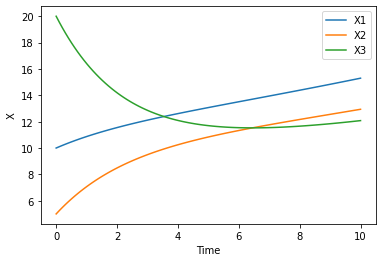

In [27]:
t = np.linspace(0, 10, 100)
X0 = np.array([10, 5, 20])
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)

plt.plot(t,X)
plt.xlabel('Time')
plt.ylabel('X')
plt.legend(['X1','X2','X3'])
plt.show()